In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
# takes in a mxn dimensions data set, with n samples and m dimensions(m different types of data)
# n is number of columns, each column is a data sample for np.cov
def pca(data):
    # make sure that the mean is 0
    # one row contains all the data for one variable, we need to find the mean of each row.
    # we go over each row (going over rows is in the coloumn direction, hence, axis=1)
    data = data - np.mean(data, axis=1, keepdims=True)
    # compute covariance of data
    data_cov = np.cov(data)
    eigensystem = np.linalg.eig(data_cov) # 0 is eigenvalues, 1 is eigenvectors
    return eigensystem[0], eigensystem[1]

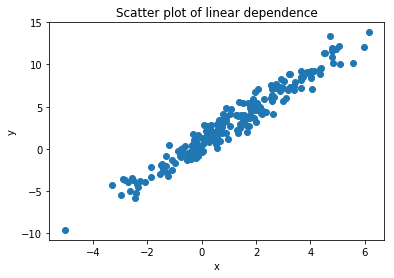

Eigenvalue: 0.1807876836061162 Eigenvector: [-0.90512593 -0.42514357]
Eigenvalue: 22.76185807596082 Eigenvector: [ 0.42514357 -0.90512593]


In [27]:
# Data set: linear dependence
x = np.random.normal(1, 2, size=200)
error = np.random.normal(1, 1, size=200)
y = 2 * x + error
plt.scatter(x,y)
plt.title("Scatter plot of linear dependence")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
data_linear = np.stack((x,y))
eigenvalues, eigenvectors = pca(data_linear)
for a in range(len(eigenvalues)):
    print("Eigenvalue: " + str(eigenvalues[a]) + " Eigenvector: " + str(eigenvectors[a]))

In [28]:
# Three camera problem
# Assume that the origin of the observation plane is also the origin of the plane 
# the harmonic oscillator is on
# (xh, yh, zh) is the position of the oscillator including noise
# phi is in [0, 2pi], theta is in [0, pi/2] assume that table is blocking the view of the camera 
# so the camera will not be placed under the table
def get_observation(xh, yh, zh, phi, theta):
    # camera position, the radius r is not important since we only need the direction of the position
    x_pos = np.sin(theta) * np.cos(phi)
    y_pos = np.sin(theta) * np.sin(phi)
    z_pos = np.cos(theta) # z
    
    # observation plane of the camera is spanned by two vectors
    # both vectors are perpendicular to the position vector of the camera
    # (x_pos, y_pos, z_pos).(x_v1, y_v1, z_v1) = 0
    x_v1 = 1
    y_v1 = 1
    z_v1 = (-x_pos * x_v1 - y_pos * y_v1) / z_pos # x axis of observation plane
    v1 = np.array([x_v1, y_v1, z_v1])
    
    # calculate the second vector by using the croos product of position and first vector
    v2 = np.cross([x_pos, y_pos, z_pos], v1) # z cross x  = y axis of observation plane
    
    # normalize v1 and v2
    v1 = v1 / np.sqrt(x_v1**2 + y_v1**2 + z_v1**2)
    v2 = v2 / np.sqrt(v2[0]**2 + v2[1]**2 + v2[2]**2)
    
    # project the position of the harmonic oscillator onto the observation plane
    x_obs = np.dot(v1, [xh, yh, zh])
    y_obs = np.dot(v2, [xh, yh, zh])
    return np.array([x_obs, y_obs])

In [42]:
# construct simple harmonic oscillator data with noise
# there are three cameras in total:
n_samples = 200
data_ho = np.zeros((6, n_samples))

phi1 = 0.5
theta1 = 0.2 
phi2 = 0.1
theta2 = 1.5
phi3 = 5
theta3 = 2.7

# Assume that the harmonic oscillator is moving fomr  x= -1 to x = 1 
# samples are recorded every 0.1 s
for t in range(n_samples):
    # ideal harmonic oscillator motion
    x = np.sin(t * 0.1)
    
    # noise
    x = x + np.random.normal(0, 0.3) 
    y = np.random.normal(0, 0.003)
    z = np.random.normal(0, 0.003)
    
    # compute camera observed positions
    cam1 = get_observation(x, y, z, phi1, theta1)    
    cam2 = get_observation(x, y, z, phi2, theta2)
    cam3 = get_observation(x, y, z, phi3, theta3)
    data_ho[0, t] = cam1[0]
    data_ho[1, t] = cam1[1]
    data_ho[2, t] = cam2[0]
    data_ho[3, t] = cam2[1]
    data_ho[4, t] = cam3[0]
    data_ho[5, t] = cam3[1]
    
data_ho_cov = np.cov(data_ho)
eigenvalues_ho, eigenvectors_ho = np.linalg.eig(data_ho_cov)

for a in range(len(eigenvalues_ho)):
    print("Eigenvalue: " + str(eigenvalues_ho[a]) + " Eigenvector: " + str(eigenvectors_ho[a]))
    
# The first eigenvalue is significantly larger than the other eigenvalues. Notice that camera 2 has phi = 0.1 
# theta = 1.5, which is about the same as the axis along the motion of the oscillator. 

Eigenvalue: 1.026506627257669 Eigenvector: [ 0.4944664   0.42695725 -0.0360603  -0.39840972 -0.53451879 -0.29145799]
Eigenvalue: 2.5613444459733324e-05 Eigenvector: [-0.49769749  0.39188381 -0.17239916  0.27900036 -0.53143324  0.59041342]
Eigenvalue: 8.669221040120946e-06 Eigenvector: [ 0.04578274  0.16429533  0.9091113   0.35649143 -0.15938801  0.03970786]
Eigenvalue: 1.032584179827284e-16 Eigenvector: [-0.07397592  0.55696356 -0.28323153  0.43744206  0.21429974 -0.44292391]
Eigenvalue: -2.814658884119292e-16 Eigenvector: [ 0.49136626  0.42816362 -0.00743428  0.02606195  0.45380255  0.54611796]
Eigenvalue: -8.019586953710514e-18 Eigenvector: [ 0.50871494 -0.37895797 -0.2494383   0.66656401 -0.39319551  0.26544509]


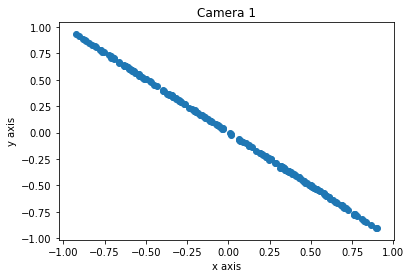

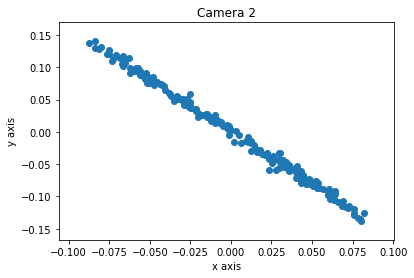

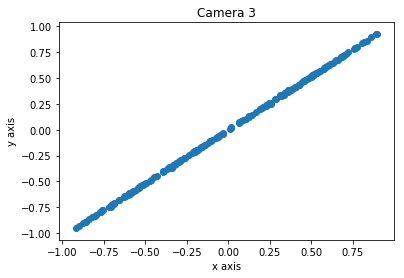

In [43]:
plt.scatter(data_ho[0, :], data_ho[1, :])
plt.title("Camera 1")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

plt.scatter(data_ho[2, :], data_ho[3, :])
plt.title("Camera 2")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

plt.scatter(data_ho[4, :], data_ho[5, :])
plt.title("Camera 3")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()